# Model selection and creation
This project consists of 5 sections. These are collectively aimed at creating a machine learning model that can produce accurate predictions and analysis on the data it is fed.

Section 1 - Data checking/validation

Section 2 - Visualisation of data and relations

Section 3 - Testing and determination of best suited ML model

Section 4 - Model implementation and tuning

Section 5 - Pickling the model

## Section 1 - Data checking/validation
In this section the data created in the previous project(A) is imported and information regarding the tables are displayed to make sure no values are missing and the tables are clean.

In [3]:
# imports needed for data manipulation/cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# import from sci-kit learn
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# import pickle module for model dumping
import pickle

In [108]:
# read the dataset that is to be used for the x values
df1 = pd.read_csv("BinaryDrivingDatabase1.csv")# x vals
# display the first 10 rows of data
df1.head(10)

,Age,Gender,Alcohol consumed,Fatigued,Time of Day,Raining
0,50,1,0,1,0,0
1,55,0,0,1,0,0
2,52,0,0,0,0,0
3,69,1,1,1,1,0
4,57,0,0,0,1,0
5,49,0,1,0,1,0
6,41,1,0,0,0,0
7,24,0,1,0,1,0
8,46,0,0,0,0,0
9,66,0,0,0,0,1


In [109]:
# display info on table 1 to see if data is clean
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               100 non-null    int64
 1   Gender            100 non-null    int64
 2   Alcohol consumed  100 non-null    int64
 3   Fatigued          100 non-null    int64
 4   Time of Day       100 non-null    int64
 5   Raining           100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


In [110]:
# read the dataset to be used for the y values
df2 = pd.read_csv("MachineLearningProj1ACrashTestData.csv")# y vals
# display the first 10 rows
df2.head(10)

,0
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [111]:
# display info on table df2 to see if data is clean
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


## Section 2 - Visualisation of data and relations
This section focuses on the columns in the binary dataset representing the driving conditions. The columns and their 
True values are used to represent the relations between features in the dataset.

### Alcohol consumption and gender

In [112]:
# group the data so as to display the ammount of male drivers under the influence of alcohol
a = df1.groupby("Alcohol consumed")
b = a.get_group(1).groupby("Gender")
print(b.get_group(1))
print(b.get_group(1).count(0))

    Age  Gender  Alcohol consumed  Fatigued  Time of Day  Raining
3    69       1                 1         1            1        0
14   41       1                 1         0            0        0
20   22       1                 1         1            1        1
21   63       1                 1         0            0        1
23   19       1                 1         0            0        1
25   58       1                 1         0            1        0
30   51       1                 1         0            0        0
31   39       1                 1         0            1        0
34   37       1                 1         0            1        0
36   59       1                 1         0            1        1
39   65       1                 1         0            1        0
41   44       1                 1         0            1        1
42   23       1                 1         0            0        1
49   64       1                 1         0            0        0
52   19   

In [113]:
# group the data so as to display the ammount of female drivers under the influence of alcohol
a = df1.groupby("Alcohol consumed")
b = a.get_group(1).groupby("Gender")
f = b.get_group(0)
k = b.get_group(0).count(0)
print(f)
print(k)

    Age  Gender  Alcohol consumed  Fatigued  Time of Day  Raining
5    49       0                 1         0            1        0
7    24       0                 1         0            1        0
10   41       0                 1         0            1        0
12   45       0                 1         1            1        0
13   54       0                 1         0            0        1
18   44       0                 1         0            0        0
28   25       0                 1         1            0        1
33   69       0                 1         0            0        0
44   69       0                 1         0            1        1
45   58       0                 1         0            0        1
46   59       0                 1         0            0        1
48   55       0                 1         0            0        1
50   71       0                 1         0            0        0
51   32       0                 1         0            1        1
56   25   

<function matplotlib.pyplot.show(*args, **kw)>

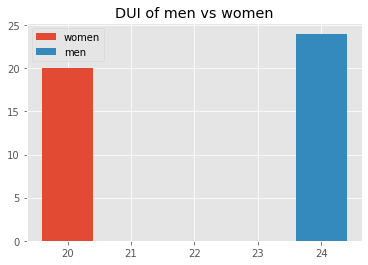

In [114]:
# DUI alcohol visualisation
womenAlc = b.get_group(0).count(0).Gender
menAlc = b.get_group(1).count(0).Gender
womenAlc
menAlc
womenAlcplot = plt.bar(womenAlc, womenAlc, label="women")
menAlcPLot = plt.bar(menAlc, menAlc, label="men")
plt.title("DUI of men vs women")
plt.legend()
plt.show

### Fatigued and gender

In [115]:
# group the data so as to display the ammount of male drivers fatigued
g = df1.groupby("Fatigued")
e = g.get_group(1).groupby("Gender")
print(e.get_group(1))
print(e.get_group(1).count(0))

    Age  Gender  Alcohol consumed  Fatigued  Time of Day  Raining
0    50       1                 0         1            0        0
3    69       1                 1         1            1        0
20   22       1                 1         1            1        1
52   19       1                 1         1            1        1
62   52       1                 1         1            1        0
Age                 5
Gender              5
Alcohol consumed    5
Fatigued            5
Time of Day         5
Raining             5
dtype: int64


In [116]:
# group the data so as to display the ammount of female drivers fatigued
g = df1.groupby("Fatigued")
e = g.get_group(1).groupby("Gender")
print(e.get_group(0))
print(e.get_group(0).count(0))

    Age  Gender  Alcohol consumed  Fatigued  Time of Day  Raining
1    55       0                 0         1            0        0
11   22       0                 0         1            0        0
12   45       0                 1         1            1        0
28   25       0                 1         1            0        1
38   25       0                 0         1            0        1
47   73       0                 0         1            0        0
91   47       0                 1         1            1        1
Age                 7
Gender              7
Alcohol consumed    7
Fatigued            7
Time of Day         7
Raining             7
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

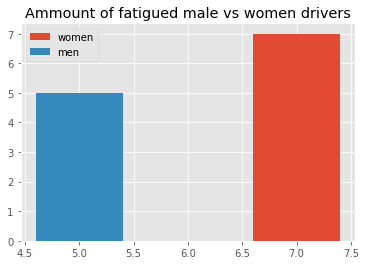

In [117]:
# Fatigued visualisation
womenFat = e.get_group(0).count(0).Gender
menFat = e.get_group(1).count(0).Gender
womenFat
menFat
womenFatplot = plt.bar(womenFat, 7, label="women")
menFatPLot = plt.bar(menFat, 5, label="men")
plt.title("Ammount of fatigued male vs women drivers")
plt.legend()
plt.show

### Traveling at night and gender

In [118]:
# group the data so as to display the ammount of male drivers traveling at night
c = df1.groupby("Time of Day")
d = c.get_group(1).groupby("Gender")
print(d.get_group(1))
print(d.get_group(1).count(0))
# balance check
#print(c.get_group(1).count(0))

    Age  Gender  Alcohol consumed  Fatigued  Time of Day  Raining
3    69       1                 1         1            1        0
15   39       1                 0         0            1        0
20   22       1                 1         1            1        1
22   55       1                 0         0            1        0
25   58       1                 1         0            1        0
27   40       1                 0         0            1        1
31   39       1                 1         0            1        0
32   46       1                 0         0            1        1
34   37       1                 1         0            1        0
36   59       1                 1         0            1        1
39   65       1                 1         0            1        0
41   44       1                 1         0            1        1
52   19       1                 1         1            1        1
54   23       1                 0         0            1        0
57   28   

In [119]:
# group the data so as to display the ammount of female drivers treveling at night
c = df1.groupby("Time of Day")
d = c.get_group(1).groupby("Gender")
print(d.get_group(0))
print(d.get_group(0).count(0))
# balance check
#print(c.get_group(1).count(0))

    Age  Gender  Alcohol consumed  Fatigued  Time of Day  Raining
4    57       0                 0         0            1        0
5    49       0                 1         0            1        0
7    24       0                 1         0            1        0
10   41       0                 1         0            1        0
12   45       0                 1         1            1        0
35   70       0                 0         0            1        0
44   69       0                 1         0            1        1
51   32       0                 1         0            1        1
56   25       0                 1         0            1        0
67   51       0                 0         0            1        0
69   56       0                 0         0            1        1
73   40       0                 0         0            1        0
83   24       0                 0         0            1        0
86   51       0                 0         0            1        0
90   67   

<function matplotlib.pyplot.show(*args, **kw)>

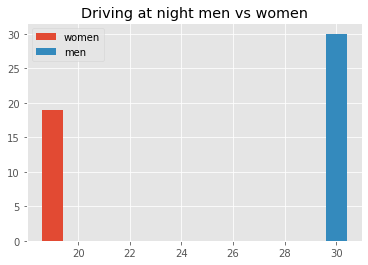

In [120]:
# Night driving visualisation
womenNight = d.get_group(0).count(0).Gender
menNight = d.get_group(1).count(0).Gender
womenNight
menNight
womenNightplot = plt.bar(womenNight, womenNight, label="women")
menNightPLot = plt.bar(menNight, menNight, label="men")
plt.title("Driving at night men vs women")
plt.legend()
plt.show

### Driving in the rain and gender

In [121]:
# group the data so as to display the ammount of male drivers in the rain
h = df1.groupby("Raining")
i = h.get_group(1).groupby("Gender")
print(i.get_group(1))
print(i.get_group(1).count(0))
# balance check
#print(h.get_group(1).count(0))

    Age  Gender  Alcohol consumed  Fatigued  Time of Day  Raining
17   71       1                 0         0            0        1
20   22       1                 1         1            1        1
21   63       1                 1         0            0        1
23   19       1                 1         0            0        1
27   40       1                 0         0            1        1
32   46       1                 0         0            1        1
36   59       1                 1         0            1        1
41   44       1                 1         0            1        1
42   23       1                 1         0            0        1
52   19       1                 1         1            1        1
55   62       1                 0         0            0        1
65   20       1                 1         0            1        1
74   24       1                 0         0            0        1
76   53       1                 0         0            0        1
80   49   

In [122]:
# group the data so as to display the ammount of female drivers in the rain
h = df1.groupby("Raining")
i = h.get_group(1).groupby("Gender")
print(i.get_group(0))
print(i.get_group(0).count(0))
# balance check
#print(h.get_group(1).count(0))

    Age  Gender  Alcohol consumed  Fatigued  Time of Day  Raining
9    66       0                 0         0            0        1
13   54       0                 1         0            0        1
28   25       0                 1         1            0        1
37   52       0                 0         0            0        1
38   25       0                 0         1            0        1
44   69       0                 1         0            1        1
45   58       0                 1         0            0        1
46   59       0                 1         0            0        1
48   55       0                 1         0            0        1
51   32       0                 1         0            1        1
58   62       0                 0         0            0        1
59   66       0                 0         0            0        1
69   56       0                 0         0            1        1
88   59       0                 1         0            0        1
91   47   

<function matplotlib.pyplot.show(*args, **kw)>

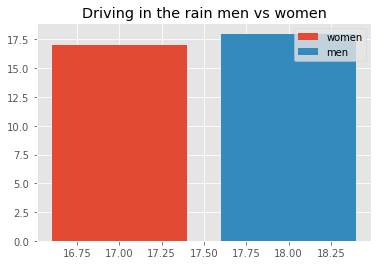

In [123]:
# driving in the rain visualisation
womenRain = i.get_group(0).count(0).Gender
menRain = i.get_group(1).count(0).Gender
womenRainplot = plt.bar(womenRain, 17, label="women")
menRainPLot = plt.bar(menRain, 18, label="men")
plt.title("Driving in the rain men vs women")
plt.legend()
plt.show

### All true feature values and gender

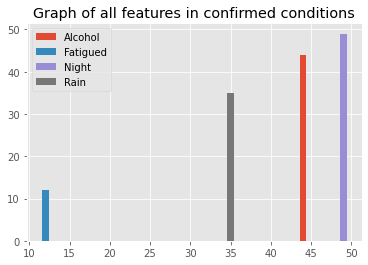

In [124]:
# visualisation of all data with 1 vals
totAlc = a.get_group(1).count(0).Gender
totFat = g.get_group(1).count(0).Gender
totNight = c.get_group(1).count(0).Gender
totRain = h.get_group(1).count(0).Gender
plt.bar(totAlc, totAlc, label="Alcohol")
plt.bar(totFat, totFat, label="Fatigued")
plt.bar(totNight, totNight, label="Night")
plt.bar(totRain, totRain, label="Rain")
plt.title("Graph of all features in confirmed conditions")
plt.legend()
plt.show()

## Section 3 - Testing and determination of best suited ML model
In this section the model selection process takes place. The data is prepared for use in the correct model and a test is run to determine the best suited ML algorithm for the case. 

In [125]:
# convert the dataframe to a numpy array for manipulation
x = df1.to_numpy()
y1 = df2.to_numpy()
# flatten the array to 1D
y = y1.flatten()
# print the shape of the array to verify changes
y.shape

(100,)

In [126]:
#select the best suited ML algorithm for the problem
# a list of candidate algorithms
algList = ["SVC", "Logistic Regression", "K-Nearest Neighbours", "random Forest"]
# a list to store the candidate algorithms' accuracy scores
accuracyList = []

In [127]:
# assign the data to the test and train variables to be used in the training of the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)# split in a 90% train 10% test ratio

In [128]:
# testing for the best suited ML algorithm
# create a dictionary containing the different algorithms and specified paramaters
modelParams = {
    "svm":{
        "model": svm.SVC(gamma="auto"),
        "params":{
            "C":[1, 10, 20],
            "kernel":["rbf", "linear"]
        }
    },
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1, 5, 10]
        }
    },
    "logistic regression":{
        "model": LogisticRegression(solver="liblinear", multi_class="auto"),
        "params":{
            "C":[1, 5, 10]
        }
    },
    "k-nearest_neighbour":{
        "model":KNeighborsClassifier(),
        "params":{
            "leaf_size":[30, 45]
        }
    }
}

In [129]:
# create a for loop that collects the accuracy scores from the models being tested from the dictionary
for model_name, mp in modelParams.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    accuracyList.append({
        "model":model_name,
        "best_score":clf.best_score_,
        "best_params":clf.best_params_
    })

In [130]:
# convert the results from the testing to a dataframe for visualisation
# determine the best suited model for the problem
accFrame = pd.DataFrame(accuracyList, columns=["model", "best_score", "best_params"])
accFrame.head(4)

,model,best_score,best_params
0,svm,0.855556,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.877778,{'n_estimators': 5}
2,logistic regression,0.855556,{'C': 1}
3,k-nearest_neighbour,0.833333,{'leaf_size': 30}


## Section 4 - Model implementation and tuning
In this section the best suited model has been determined and is implemented. The data is fed to the model and the training process takes place. After training and testing , cross validation is done on the model to determine the best parameters for optimal performance. The prediction results are displayed in both binary and probabilistic formats for analysis. 

In [131]:
# instantiate the svc model as it was best suited for the situational data
model = svm.SVC(probability=True)# probability is True to enable the display of probabilistic values
# fit the model with the x and y training data
model.fit(x_train, y_train)

SVC(probability=True)

In [132]:
# use the x test values to predict the y test values
print("Prediction:",model.predict(x_test))
# show the y test values to compare accuracy
print("y-values:",y_test)
# show the accuracy score of the prediction
print("Model accuracy:",model.score(x_train, y_train))

Prediction: [0 0 0 0 0 0 0 0 0 0]
y-values: [0 0 0 0 0 0 1 0 0 0]
Model accuracy: 0.8444444444444444


In [133]:
# create the cross validation structure
gridSCV = GridSearchCV(svm.SVC(gamma="auto"),{
    "C":[1, 10, 20],
    "kernel":["rbf", "linear"]},  
     cv = 5, 
     return_train_score = False)

In [134]:
# fit the data for validation
gridSCV.fit(x_train, y_train)
gridSCV.cv_results_
# convert the results to a dataframe for optimal analysis
dfG = pd.DataFrame(gridSCV.cv_results_)
# select and display the columns of interest
dfG[["param_C","param_kernel","mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.833333
1,1,linear,0.844444
2,10,rbf,0.800000
3,10,linear,0.855556
4,20,rbf,0.800000
5,20,linear,0.855556


In [135]:
# display the best suited paramaters for the model
bp = gridSCV.best_params_
bp

{'C': 10, 'kernel': 'linear'}

In [136]:
# appy the best suited arguments to the SVC model
model = svm.SVC(probability=True, C=bp["C"], kernel=bp["kernel"])

In [137]:
# test the new parameters to see if there is an improvement in accuracy
model.fit(x_train, y_train)
print(model.predict(x_test))
print(model.score(x_train, y_train))

[0 0 0 0 0 0 1 0 0 1]
0.8777777777777778


In [138]:
# predict the probability of the above predicted results
t = model.predict_proba(x_test)
t

array([[0.82673913, 0.17326087],
       [0.82667049, 0.17332951],
       [0.866151  , 0.133849  ],
       [0.84741395, 0.15258605],
       [0.86620621, 0.13379379],
       [0.82670999, 0.17329001],
       [0.75113302, 0.24886698],
       [0.82668969, 0.17331031],
       [0.82671831, 0.17328169],
       [0.77854747, 0.22145253]])

In [139]:
# a conditional statement that returns the probability of the predicted results
for line in t:
    if line[0] > line[1]:
        print(line[0]*100)
    elif line[0] < line[1]:
        print(line[1]*100)

82.67391320471057
82.66704938851068
86.61510046478988
84.7413949296503
86.62062131081439
82.670999030592
75.11330173581445
82.66896929558206
82.67183117768727
77.85474654395422


## Section 5 - Pickling the model
In this section the trained and tuned algorithm is pickled into a file for use on other datasets. The file has both been written and read in binary form. The file has been read to provide a practical example for use.

In [140]:
# dump the model into a pickle file for use
with open("Model_Pickle","wb") as f:
    pickle.dump(model,f)

In [141]:
# reload the model under a new alias for further use and example
with open("Model_Pickle","rb") as d:
    mp = pickle.load(d)